In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv('/kaggle/input/pharma-sales-data/salesdaily.csv')  #index_col='datum'
df_daily = pd.read_csv(r'C:\Users\sanik\OneDrive\ML\group mini pro\salesdaily.csv',index_col='datum',parse_dates=True) 

In [3]:
df_daily.shape

(2106, 12)

In [4]:
df_daily.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [5]:
df_daily.drop(columns=['Year','Month', 'Hour', 'Weekday Name'], inplace=True)

In [6]:
df_daily.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0


<Axes: xlabel='datum'>

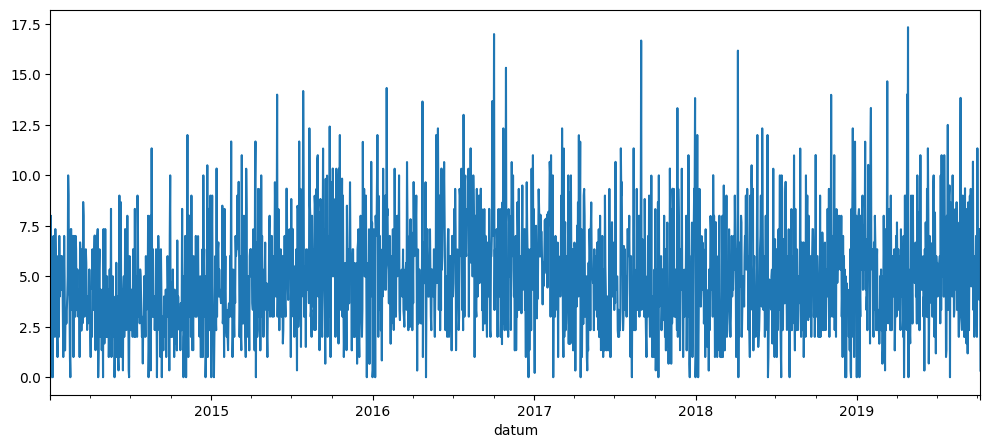

In [7]:
df_daily['M01AB'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_daily.M01AB.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.279357
p-value: 0.000000


In [9]:
from pmdarima import auto_arima
model_autoARIMA = auto_arima(df_daily['M01AB'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13331.256, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11325.266, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12374.478, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=10886.922, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=10693.697, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=10586.376, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=10500.732, Time=0.38 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=10159.734, Time=1.43 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=10158.416, Time=1.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=10156.708, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10154.742, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10152.762, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=10154.742, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=11917.056, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

The ACF plot helps in identifying the order of the moving average (MA) component (q), while the PACF plot helps in identifying the order of the autoregressive (AR) component (p). 

In [11]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df_daily['M01AB'],order=(1,0,1),freq='D')
res = model.fit()
res.summary()

C:\Users\sanik\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M01AB   No. Observations:                 2106
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5070.153
Date:                Fri, 12 Apr 2024   AIC                          10148.307
Time:                        10:26:47   BIC                          10170.917
Sample:                    01-02-2014   HQIC                         10156.587
                         - 10-08-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9991      0.349     14.333      0.000       4.315       5.683
ar.L1          0.9972      0.002    431.414      0.000       0.993       1.002
ma.L1         -0.9826      0.006   -171.409      0.000      -0.994      -0.971
sigma2         7.2190      0.205     35.153      0.000       6.817       7.622
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               176.89
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
print(res.fittedvalues)

datum
2014-01-02    4.999052
2014-01-03    4.746607
2014-01-04    4.903734
2014-01-05    4.770741
2014-01-06    4.737538
                ...   
2019-10-04    5.500372
2019-10-05    5.525799
2019-10-06    5.499729
2019-10-07    5.476447
2019-10-08    5.502289
Length: 2106, dtype: float64


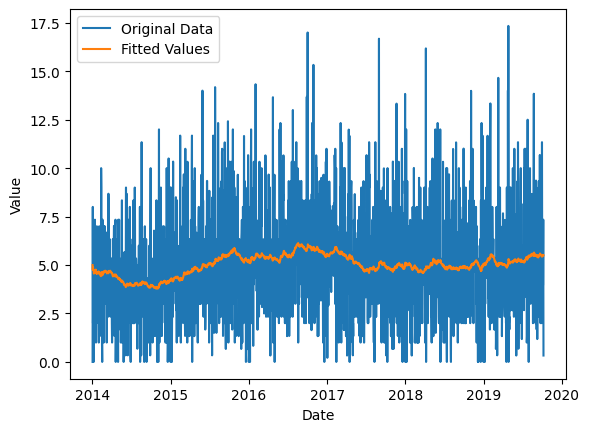

In [13]:
fig, ax = plt.subplots()
ax.plot(df_daily.index, df_daily['M01AB'], label='Original Data')
ax.plot(df_daily.index, res.fittedvalues, label='Fitted Values')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [17]:
# # Forecast
# forecast_steps = 1000  # Number of steps to forecast
# forecast = model.forecast(steps=forecast_steps)
print(res.fittedvalues)

datum
2014-01-02    4.999052
2014-01-03    4.746607
2014-01-04    4.903734
2014-01-05    4.770741
2014-01-06    4.737538
                ...   
2019-10-04    5.500372
2019-10-05    5.525799
2019-10-06    5.499729
2019-10-07    5.476447
2019-10-08    5.502289
Length: 2106, dtype: float64


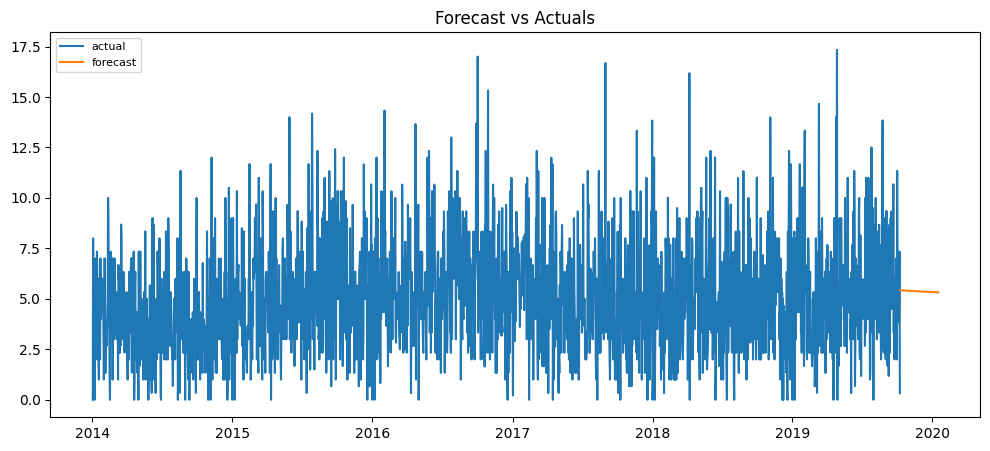

In [21]:
fitted = model.fit()  
# print(fitted.summary())

# Forecast
fc = fitted.forecast(steps=100)  # Forecast for 15 steps ahead

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_daily['M01AB'], label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [22]:
# Get forecast
from sklearn.metrics import mean_squared_error
forecast = model_autoARIMA.predict(n_periods=len(df_daily))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df_daily['M01AB'], forecast))

print("RMSE:", rmse)

RMSE: 2.762876205737007


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming forecast and df['N02BA'] are arrays or lists containing the predicted values and actual values respectively

# Calculate RMSE
mse = mean_squared_error(df_daily['M01AB'], forecast)

# Calculate MAE
mae = mean_absolute_error(df_daily['M01AB'], forecast)

print("MSE:", mse)
print("MAE:", mae)

MSE: 7.633484928227719
MAE: 2.2148890987965855


In [84]:
param_space = dict(p= range(0, 30),
                   d= range(0, 30),
                   q =range(0, 30),
                   trend = ['n', 'c', 't', 'ct']
                  )

In [86]:
pip install arm-mango

In [87]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from mango import scheduler, Tuner

def arima_objective_function(args_list):
    global data_values
    
    params_evaluated = []
    results = []
    
    for params in args_list:
        try:
            p,d,q = params['p'],params['d'], params['q']
            trend = params['trend']
            
            model = ARIMA(data_values, order=(p,d,q), trend = trend)
            predictions = model.fit()

            mse = mean_squared_error(data_values, predictions.fittedvalues)   
            params_evaluated.append(params)
            results.append(mse)
        except:
            #print(f"Exception raised for {params}")
            #pass 
            params_evaluated.append(params)
            results.append(1e5)
        
        #print(params_evaluated, mse)
    return params_evaluated, results

In [88]:
from mango import scheduler, Tuner

conf_Dict = dict()
conf_Dict['num_iteration'] = 200

tuner = Tuner(param_space, arima_objective_function, conf_Dict)

In [91]:
def plot_arima(data_values, order = (1,1,1), trend = 'c'):
    print('final model:', order, trend)
    model = ARIMA(data_values, order=order, trend = trend)
    results = model.fit()
    
    error = mean_squared_error(data_values, results.fittedvalues)   
    print('MSE error is:', error)
    
    from matplotlib import pyplot as plt
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(6)
    plt.plot(data_values, label = "original Series", linewidth = 4)
    plt.plot(results.fittedvalues, color='red', label = "Predictions", linestyle='dashed', linewidth = 3)
    plt.legend(fontsize = 25)
    plt.xlabel('Months', fontsize = 25)
    plt.ylabel('Count', fontsize = 25)
    plt.show()

    print(results['best_params'])

    order = (results['best_params']['p'], results['best_params']['d'], results['best_params']['q'])
plot_arima(data_values, order=order, trend = results['best_params']['trend'])

NameError: name 'data_values' is not defined